# **MODEL BUILDING AND TESTING BY TEAM DATA PIRATES**

# Table of Contents:
**1. Problem Statement </br>
</br>
2. Data Preprocessing and Data Visualization </br>
        * Normalization and Standardization </br>
        * Histogram, Scatter Plot and Heat Map </br>
</br>
3. Model Building and Cross Validation </br>
        * Linear Regression Model and  Neural Network </br>
        * Lasso and Ridge Regression Model </br>
        * KNN Model </br>
        * SVR Model </br>
        * ANN Model </br>
</br>
4. Performance Metrics</br>
        * RMSE</br>
        * MAE</br>
        * R^2 score </br>
</br>
5. Comparison Analysis among All Models based on Performance Metrics</br>
</br>
6. Conclusion**

# Problem Statement

Our Project objective is to predict the price of the model based on the given features of the camera model. We have used the various Machine Learning Algorithms Models like KNN (k-nearest neighbours), Linear Regression and SVR.

# Libraries for Model building and Testing

In [450]:
import math
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import sklearn
import sklearn.preprocessing as pre
import sklearn.linear_model as lm
import seaborn as sns
import sklearn.datasets
import sklearn.neighbors as nb
import sklearn.pipeline as pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
import sklearn.neural_network as nn 
import sklearn.metrics as metrics
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score

In [451]:
df=pd.read_csv('E:\PES COLLEGE\SEM 5\Data Analytics Project\camera_dataset.csv')

In [452]:
df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,NaN,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,NaN,4.0,420.0,158.0,179
2,Agfa ePhoto CL18,2000,640.0,NaN,NaN,45.0,45.0,NaN,NaN,2.0,NaN,NaN,179
3,Agfa ePhoto CL30,1999,1152.0,640.0,NaN,35.0,35.0,NaN,NaN,4.0,NaN,NaN,269
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,NaN,43.0,43.0,50.0,NaN,40.0,300.0,128.0,1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62


# Data Preprocessing 

In [453]:
for i in df:
       if(i=="Model"):
            continue;
       if(i=='Price' or i=='Weight (inc. batteries)'):
           df[i].fillna(df[i].mean(),inplace=True)
       else:
           df[i].fillna(int(df[i].mean()),inplace=True)


# Normalization of the Data

We have took only the features which shows more correlation among them for price prediction of the camera models.

In [454]:
numeric_dataset = df[['Max resolution','Low resolution','Effective pixels','Weight (inc. batteries)','Dimensions','Price']]
df=(numeric_dataset-numeric_dataset.mean())/numeric_dataset.std()


Random sampling

In [455]:
df=df.sample(frac=1)

In [456]:
df.isnull().sum().sum()

0

In [457]:
df

,Max resolution,Low resolution,Effective pixels,Weight (inc. batteries),Dimensions,Price
351,-0.186681,0.601515,-0.269358,-0.569635,-0.756733,-0.431827
434,0.121678,0.979610,0.099013,-0.686787,-0.708822,-0.435772
599,-0.250206,0.245662,-0.637729,0.055175,0.057766,-0.011026
115,0.787363,1.001851,0.835755,-0.511060,-0.804645,-0.096501
169,-0.567829,-1.177753,-0.637729,0.133276,1.303472,-0.274027
...,...,...,...,...,...,...
10,-1.584224,-1.177753,-1.374472,-0.393908,0.153590,-0.418677
61,1.867282,1.313223,1.940869,1.937416,1.878413,1.106729
948,-1.160726,-0.821899,-1.374472,-0.198654,0.968090,-0.037326
378,-1.753623,-1.711533,-0.269358,-0.022926,0.393149,-0.431827


In [458]:
df.describe()

,Max resolution,Low resolution,Effective pixels,Weight (inc. batteries),Dimensions,Price
count,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03
mean,1.004067e-16,-9.647603e-17,-1.187233e-16,-9.720334e-16,3.432814e-16,-7.433574e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.600618e+00,-2.156350e+00,-1.374472e+00,-8.820407e-01,-3.679350e+00,-5.830531e-01
25%,-5.678294e-01,-7.996583e-01,-6.377293e-01,-5.637779e-01,-6.968437e-01,-4.055273e-01
50%,1.097669e-01,2.456618e-01,-2.693581e-01,-3.743822e-01,-1.817923e-01,-3.397770e-01
75%,7.873632e-01,9.573691e-01,8.357554e-01,8.446290e-02,3.931487e-01,-7.677582e-02
max,4.154170e+00,4.337979e+00,5.992952e+00,5.990874e+00,6.382118e+00,9.917268e+00


# Data Visualization

Histogram

array([[<AxesSubplot:title={'center':'Max resolution'}>,
        <AxesSubplot:title={'center':'Low resolution'}>],
       [<AxesSubplot:title={'center':'Weight (inc. batteries)'}>,
        <AxesSubplot:title={'center':'Dimensions'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

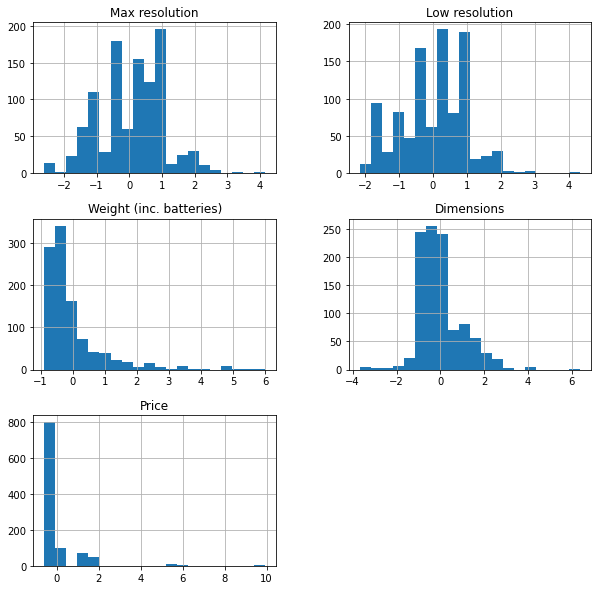

In [459]:
df.hist(column=["Max resolution","Low resolution","Weight (inc. batteries)","Dimensions","Price"],bins=20,figsize=(10,10))

Correlation Graph: Heat map

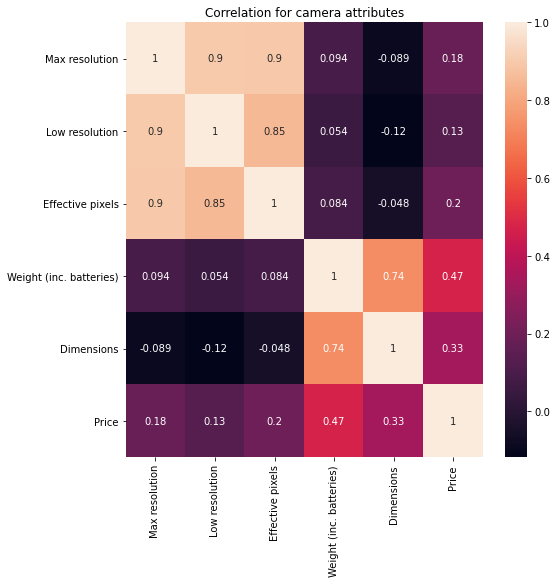

In [460]:
df_corr=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.title('Correlation for camera attributes')
plt.show()

Scatter Plot

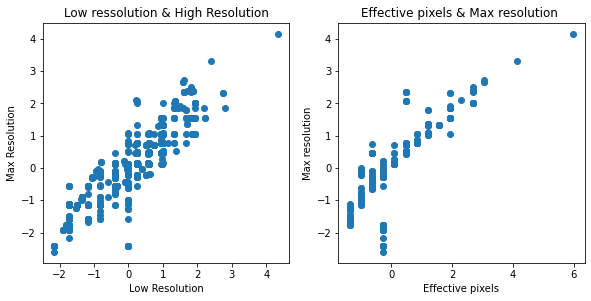

In [461]:
fig= plt.figure(figsize=(15,15))
ax2=fig.add_subplot(331)
plt.scatter(df['Low resolution'], df['Max resolution'])
plt.title('Low ressolution & High Resolution')
plt.xlabel('Low Resolution')
plt.ylabel('Max Resolution')
ax2=fig.add_subplot(332)
plt.scatter(df["Effective pixels"], df['Max resolution'])
plt.title('Effective pixels & Max resolution ')
plt.xlabel('Effective pixels')
plt.ylabel('Max resolution')
plt.show()

# MODEL BUILDING AND CROSS VALIDATION (using K- fold CROSS-VALIDATION for all models)

In [462]:
X=df.drop('Price',axis=1)
Y=df['Price']

# LINEAR REGRESSION MODEL

In [463]:

pipe_lr=pipeline.Pipeline([('scaler',StandardScaler()),('model',lm.LinearRegression())])

# RMSE scores 

In [464]:
rmse_scores = -1*cross_val_score(pipe_lr, X,Y, cv=5,scoring='neg_root_mean_squared_error')
print(rmse_scores)
sum=0
for i in rmse_scores:
    sum=sum+i
avg=sum/5.0
print(avg)

[0.86701792 0.74446099 0.92885055 0.94679    0.88984531]
0.8753929537278434


# MAE scores

In [465]:
mae_scores= -1*cross_val_score(pipe_lr, X,Y, cv=5,scoring='neg_mean_absolute_error')
print(mae_scores)
sum=0
for i in mae_scores:
    sum=sum+i
avg=sum/5.0
print(avg)

[0.47147306 0.43558183 0.43714886 0.48243376 0.51011537]
0.4673505741093352


# Rsquare scores

In [466]:
r2_score = cross_val_score(pipe_lr, X,Y, cv=5,scoring='r2')
print(r2_score)
sum=0
for i in r2_score:
    sum=sum+i
avg=sum/5.0
print(avg)

[ 0.20618638 -0.23854804  0.24627787  0.30576868  0.30925079]
0.16578713499426906


# RIDGE AND LASSO REGRESSION MODEL

In [467]:
from sklearn.linear_model import Lasso,Ridge

In [468]:
pipe_la = pipeline.Pipeline([('scaler',StandardScaler()),('model',Lasso())])
pipe_ri = pipeline.Pipeline([('scaler',StandardScaler()),('model',Ridge())])

# Rsquare scores for Lasso Regression

In [469]:
la_r2=cross_val_score(pipe_la,X,Y,cv=5,scoring='r2')
print(la_r2)
sum=0
for i in la_r2:
    sum=sum+i
avg=sum/5.0
print(avg)


[-3.91438198e-05 -3.78857108e-02 -7.74565359e-04 -4.13388572e-04
 -1.21022814e-02]
-0.010243017990154346


# Rsquare scores for Ridge Regression

In [470]:
ri_r2=cross_val_score(pipe_ri,X,Y,cv=5,scoring='r2')
print(ri_r2)
sum=0
for i in ri_r2:
    sum=sum+i
avg=sum/5.0
print(avg)

[ 0.20623137 -0.23641549  0.2463433   0.30543766  0.30910046]
0.16613946065984714


# KNN REGRESSION MODEL

In [471]:
pipe_knn=pipeline.Pipeline([('scaler',StandardScaler()),('model',nb.KNeighborsRegressor(n_neighbors=5,p=1,weights='distance',metric='chebyshev'))])

# RMSE scores

In [472]:
knn_rmse = -1*cross_val_score(pipe_knn, X,Y, cv=5,scoring='neg_root_mean_squared_error')
print(knn_rmse)
sum=0
for i in knn_rmse:
    sum=sum+i
avg=sum/5
print(avg)


[0.77460538 0.57576223 0.88025254 0.69594886 0.7178016 ]
0.7288741229521428


# MAE scores

In [473]:
knn_mae = -1*cross_val_score(pipe_knn, X,Y, cv=5,scoring='neg_mean_absolute_error')
print(knn_mae)
sum=0
for i in knn_mae:
    sum=sum+i
avg=sum/5
print(avg)

[0.37328099 0.3091065  0.37930907 0.36782261 0.38927704]
0.36375924262816794


# Rsquare scores

In [474]:
knn_r2 = cross_val_score(pipe_knn,X,Y,cv=5,scoring='r2')
print(knn_r2)
sum=0
for i in knn_r2:
    sum=sum+i
avg=sum/5
print(avg)


[0.36638797 0.25917554 0.32308497 0.62489614 0.55053051]
0.424815025578428


# SVR MODEL

In [475]:
pipe_svr=pipeline.Pipeline([('scaler',StandardScaler()),('model',svm.SVR(kernel='linear',gamma='scale',C=4))])

# RMSE scores

In [476]:
svr_rmse = -1*cross_val_score(pipe_svr,X,Y,scoring='neg_root_mean_squared_error')
print(svr_rmse)
sum=0
for i in svr_rmse:
    sum=sum+i
avg=sum/5
print(avg)

[0.9421007  0.63884119 1.03963047 1.05735892 1.03727233]
0.9430407194975864


# MAE scores

In [477]:
svr_mae = -1*cross_val_score(pipe_svr,X,Y,cv=5,scoring='neg_mean_absolute_error')
print(svr_mae)
sum=0
for i in svr_mae:
    sum=sum+i
avg=sum/5
print(avg)

[0.39857707 0.3078853  0.39524274 0.40496458 0.48108075]
0.3975500881678998


# Rsquare scores

In [478]:
svr_r2 = cross_val_score(pipe_svr,X,Y,cv=5,scoring='r2')
print(svr_r2)
sum=0
for i in svr_r2:
    sum=sum+i
avg=sum/5
print(avg)

[0.06274654 0.08795811 0.05577047 0.13415183 0.06140779]
0.08040694712717307


# NEURAL  NETWORK MODEL (Just a trial,didn't really work for our data and takes too much time for execution)

In [479]:
#pipe_nn=pipeline.Pipeline([('scaler',StandardScaler()),('model',nn.MLPRegressor(hidden_layer_sizes=300,max_iter=50000,n_iter_no_change=100000,verbose=True))])
#nn_mae = -1*cross_val_score(pipe_nn,X,Y,cv=5,scoring='neg_mean_absolute_error')
#nn_rmse =-1*cross_val_score(pipe_nn,X,Y,scoring='neg_root_mean_squared_error')
#nn_r2 = cross_val_score(pipe_nn,X,Y,cv=5,scoring='r2')
#print(nn_mae)
#print(nn_rmse)
#print(nn_r2)

# Comparison Analysis

**From the RMSE, MSE and Rsquare scores of the above all the Regression models we can make a inference that KNN model is better than all other models. </br>
      RMSE of Linear Regression - 0.8756 </br>
      R^2 of Lasso and Ridge Regression - 0.1269</br>
      RMSE of KNN - 0.7293 </br>
      RMSE of SVR - 0.9456 </br>
      But we can clearly see that RMSE value of KNN Model is less compare to other models. In this Model evaluation we have consider the normalized data and we came to conclusion that KNN is the best model for prediction.**
      

# Conclusion

**The Dataset which we have used consist of less correlation among the features so our accuracy is around 50 to 70% which is given by KNN Model. We have not split the data explicitly to test the model instead we have used the 5-fold cross validation test which automatically splits the data in 80-20 split and based various Performance Metrics scores we have came to conclusion that KNN Model is best for our dataset. We have also performed the tuning of parameters of the models by eliminating the less correlated features (attributes) from the datasset and then trained the model. The other Regression models are not so good for our dataset and we can concluded that KNN Model is best for our problem that is Price Prediction of the camera model.**

# Contribution
# Team Data Pirates 
**Team Members :**</br>
**Phani KumarVedurumudi  - PES2UG19CS281**</br> 
**Pawan Prasad P - PES2UG19CS280**</br> 
**G U Deepak - PES2UG19CS124**</br> 
**Jayanth O - PES2UG19CS163**</br>